In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
class Value:
    def __init__(self,data , _children =() , _op = '', label = ''):
        self.data = data
        self._op = _op
        self.grad = 0.0
        self._backward = lambda : None
        self.label = label
        self._prev = set(_children)
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        out = Value(self.data + other.data , (self, other) , '+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        
        return out
    def __mul__(self,other):
        out = Value(self.data * other.data ,( self , other), '*')
        def _backward():
            self.grad = other.data * out.grad
            out.grad = self.data * out.grad
        out._backward = _backward
        return out
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1)/(math.exp(2*n) + 1)
        out = Value(t,(self, ),'tanh')
        def _backward():
            self.grad = (1-t**2) * out.grad
        out._backward = _backward
        
        return out
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
        

In [5]:
from graphviz import Digraph
def trace(root):
    nodes ,edges = set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges
def draw_dot(root):
    dot = Digraph(format='svg',graph_attr={'rankdir' : 'LR'})
    nodes,edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid,label = "{%s | data %.4f | grad %.4f}" %(n.label , n.data,n.grad), shape = 'record')
        if n._op:
            dot.node(name = uid + n._op ,label = n._op)
            dot.edge(uid + n._op , uid)
    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2)) + n2._op)
    return dot

In [6]:
def test():

    h = 0.001
    
    a = Value(2.0 , label = 'a')
    b = Value(-3.0 , label = 'b')
    c = Value(10.0 , label = 'c')
    e = a * b ; e.label = 'e'
    d = e + c ; d.label = 'd'
    f = Value(-2.0 , label = 'f')
    L = d * f ; L.label = 'L'
    L1 = L.data

    a = Value(2.0 , label = 'a')
    b = Value(-3.0 , label = 'b')
    c = Value(10.0 , label = 'c')
    e = a * b ; e.label = 'e'
    c.data += h
    d = e + c ; d.label = 'd'
    f = Value(-2.0 , label = 'f')
    L = d * f ; L.label = 'L'
    L2 = L.data
    print((L2-L1)/h)

In [7]:
a = Value(2.0 , label = 'a')
b = Value(-3.0 , label = 'b')
c = Value(10.0 , label = 'c')
e = a * b ; e.label = 'e'
d = e + c ; d.label = 'd'
f = Value(-2.0 , label = 'f')
L = d * f ; L.label = 'L'
L.grad = 1

In [8]:
test()

-1.9999999999988916


In [9]:
f.grad = 4
d.grad = -2

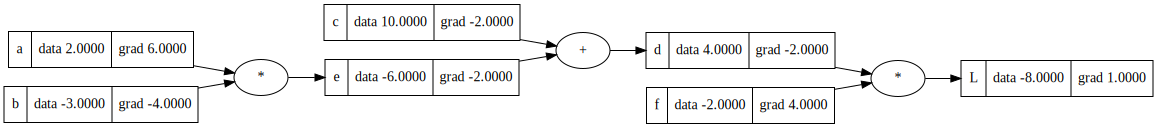

In [11]:
draw_dot(L)

In [10]:
c.grad = -2.00
e.grad = -2.00
a.grad = -2.00 * -3.00
b.grad = 2.00 * -2.00

In [12]:
a.data += 0.01*a.grad
b.data += 0.01 *b.grad
c.data += 0.1 * c.grad
f.data += 0.01 *f.grad

In [13]:
e = a * b
d = e + c
L = d * f

In [54]:
#input x1_x2
x1 = Value(2.0,label = 'x1')
x2 = Value(0.0 ,label = 'x2')
w1 = Value(-3.0 ,label = 'w1')
w2 = Value(1.0,label='w2')
b = Value(6.88 , label = 'b')
x1w1 = x1*w1 ;x1w1.label = 'x1w1'
x2w2 = x2*w2 ;x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2 ;x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b ; n.label = 'n'
o = n.tanh() ; o.label = 'o'

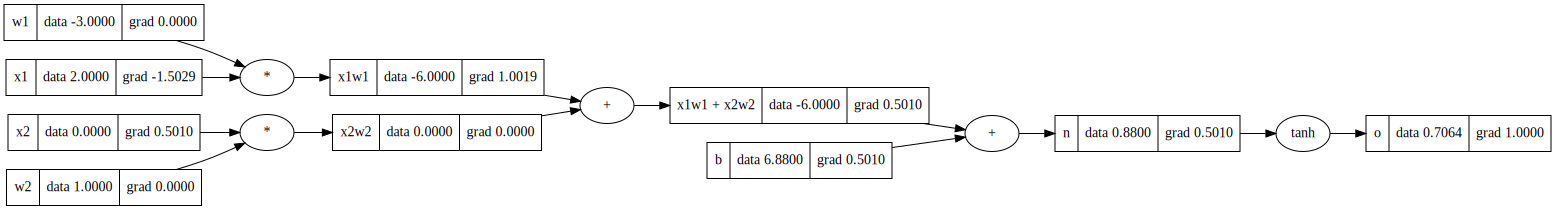

In [59]:
draw_dot(o)

In [58]:
o.backward()